In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
np.random.seed(42)

pd.set_option('display.max_rows', 500)


In [2]:
csv_path = "../../../../../../data/benzinga/"

In [3]:
df = pd.read_csv(csv_path + "20100101_to_20220304.csv", low_memory=False, index_col="id")

In [4]:
df.tail()

,date,author,created,updated,title,teaser,body,url,image,channels,stocks,tags
id,,,,,,,,,,,,
26001545.0,2022-03-04,Benzinga Newsdesk,"Fri, 04 Mar 2022 16:51:01 -0400","Fri, 04 Mar 2022 16:51:02 -0400","NY Pension Chief Sends Letter To McDonald's, P...",-Reuters,<p>-Reuters</p>,https://www.benzinga.com/news/22/03/26001545/n...,[],"[{'name': 'News'}, {'name': 'Rumors'}]","[{'name': 'EL'}, {'name': 'MCD'}, {'name': 'PE...",[]
25999924.0,2022-03-04,Chris Katje,"Fri, 04 Mar 2022 17:22:37 -0400","Fri, 04 Mar 2022 17:22:37 -0400",The Next Jeopardy Or Wordle? Netflix Launching...,Fans of Wordle or those who miss the daily liv...,<p>Fans of <strong>Wordle</strong> or those wh...,https://www.benzinga.com/general/entertainment...,"[{'size': 'thumb', 'url': 'https://cdn.benzing...","[{'name': 'Entertainment'}, {'name': 'News'}, ...","[{'name': 'NFLX'}, {'name': 'NYT'}]","[{'name': 'HQ Trivia'}, {'name': 'Mobile Games..."
26002401.0,2022-03-04,Henry Khederian,"Fri, 04 Mar 2022 17:29:52 -0400","Fri, 04 Mar 2022 17:29:52 -0400",Markets Close Lower As Russia-Ukraine War Esca...,U.S. indices traded lower after Russian forces...,<p>U.S. indices traded lower after Russian for...,https://www.benzinga.com/markets/cryptocurrenc...,"[{'size': 'thumb', 'url': 'https://cdn.benzing...","[{'name': 'News'}, {'name': 'After-Hours Cente...","[{'name': 'APTV'}, {'name': 'COST'}, {'name': ...",[]
25994316.0,2022-03-04,Chris Katje,"Fri, 04 Mar 2022 18:05:42 -0400","Fri, 04 Mar 2022 18:05:43 -0400",Here's How Much $100 In Dogecoin Could Be Wort...,One of the most popular cryptocurrencies took ...,<p>One of the most popular cryptocurrencies to...,https://www.benzinga.com/markets/cryptocurrenc...,"[{'size': 'thumb', 'url': 'https://cdn.benzing...","[{'name': 'Cryptocurrency'}, {'name': 'Markets...","[{'name': '$DOGE'}, {'name': 'CMCSA'}, {'name'...","[{'name': 'Doge'}, {'name': 'dogecoin'}, {'nam..."
25984470.0,2022-03-04,Samyuktha Sriram,"Fri, 04 Mar 2022 09:35:03 -0400","Sat, 05 Mar 2022 10:37:38 -0400","Dogecoin Wallet Released For iOS, DOGE Co-Crea...",A self-custodian Dogecoin (CRYPTO: DOGE) walle...,<p>A self-custodian <strong>Dogecoin </strong>...,https://www.benzinga.com/markets/cryptocurrenc...,"[{'size': 'thumb', 'url': 'https://cdn.benzing...","[{'name': 'Cryptocurrency'}, {'name': 'News'},...","[{'name': '$DOGE'}, {'name': 'AAPL'}, {'name':...","[{'name': 'App Store'}, {'name': 'Apple App St..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 183667 entries, 74371.0 to 25984470.0
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      183577 non-null  object
 1   author    183657 non-null  object
 2   created   183667 non-null  object
 3   updated   183667 non-null  object
 4   title     183655 non-null  object
 5   teaser    25425 non-null   object
 6   body      147535 non-null  object
 7   url       183487 non-null  object
 8   image     183487 non-null  object
 9   channels  183487 non-null  object
 10  stocks    183487 non-null  object
 11  tags      183487 non-null  object
dtypes: object(12)
memory usage: 18.2+ MB


In [6]:
def has_ticker(stocks, ticker):
    answer = False
    
    if ticker in stocks:
        answer = True

    return answer

In [7]:
data = [{
    "id": 745326,
    "author": "Benzinga",
    "created": "Mon, 03 Jan 2011 07:30:00 -0400",
    "updated": "Mon, 03 Jan 2011 07:39:48 -0400",
    "title": "Fidelity's Biggest Stock Picks Going Into 2011",
    "teaser": "",
    "body": "Included are Apple and Google. Absent are Netflix and F5 Networks.",
    "url": "https://www.benzinga.com/node/745326",
    "image": [],
    "channels": [],
    "stocks": [
        {"name": "AAPL"},
        {"name": "BRCM"},
        {"name": "CRM"},
        {"name": "EBAY"},
        {"name": "GOOG"},
        {"name": "ORCL"},
    ],
    "tags": [],
},
{
    "id": 745431,
    "author": "Benzinga",
    "created": "Mon, 03 Jan 2011 08:00:00 -0400",
    "updated": "Mon, 03 Jan 2011 08:12:23 -0400",
    "title": "Even CEOs Need to Eat at CES",
    "teaser": "",
    "body": "Whether to woo clients or take a breather, Las Vegas has all the dining options you'll need during CES.",
    "url": "https://www.benzinga.com/node/745431",
    "image": [],
    "channels": [],
    "stocks": [
        {"name": "LVS"},
        {"name": "MGM"},
        {"name": "MSFT"},
        {"name": "NFLX"},
        {"name": "WYNN"},
    ],
    "tags": [],
}]

In [8]:
df_test = pd.DataFrame(data).set_index("id")

In [9]:
df_test["AAPL"] = df_test.apply(lambda x: has_ticker(str(x['stocks']), "AAPL"), axis=1)

In [10]:
df_test.head()

,author,created,updated,title,teaser,body,url,image,channels,stocks,tags,AAPL
id,,,,,,,,,,,,
745326,Benzinga,"Mon, 03 Jan 2011 07:30:00 -0400","Mon, 03 Jan 2011 07:39:48 -0400",Fidelity's Biggest Stock Picks Going Into 2011,,Included are Apple and Google. Absent are Netf...,https://www.benzinga.com/node/745326,[],[],"[{'name': 'AAPL'}, {'name': 'BRCM'}, {'name': ...",[],True
745431,Benzinga,"Mon, 03 Jan 2011 08:00:00 -0400","Mon, 03 Jan 2011 08:12:23 -0400",Even CEOs Need to Eat at CES,,"Whether to woo clients or take a breather, Las...",https://www.benzinga.com/node/745431,[],[],"[{'name': 'LVS'}, {'name': 'MGM'}, {'name': 'M...",[],False


In [11]:
df["AAPL"] = df.apply(lambda x: has_ticker(str(x['stocks']), "AAPL"), axis=1)
df["MSFT"] = df.apply(lambda x: has_ticker(str(x['stocks']), "MSFT"), axis=1)
df["AMZN"] = df.apply(lambda x: has_ticker(str(x['stocks']), "AMZN"), axis=1)
df["FB"] = df.apply(lambda x: has_ticker(str(x['stocks']), "FB"), axis=1)
df["NVDA"] = df.apply(lambda x: has_ticker(str(x['stocks']), "NVDA"), axis=1)
df["INTC"] = df.apply(lambda x: has_ticker(str(x['stocks']), "INTC"), axis=1)
df["NFLX"] = df.apply(lambda x: has_ticker(str(x['stocks']), "NFLX"), axis=1)

In [12]:
df[df["AAPL"]==True].shape[0]

54582

In [13]:
df_aapl = df[df["AAPL"]==True]
df_msft = df[df["MSFT"]==True]
df_amzn = df[df["AMZN"]==True]
df_fb = df[df["FB"]==True]
df_nvda = df[df["NVDA"]==True]
df_intc = df[df["INTC"]==True]
df_nflx = df[df["NFLX"]==True]

In [14]:
df_aapl[df_aapl.index.duplicated(keep="first")].shape[0]

25505

In [15]:
df_aapl[~df_aapl.index.duplicated(keep=False)].shape[0]

19677

In [16]:
df_aapl_duplicates = df_aapl[df_aapl.index.duplicated(keep=False)].sort_index()

In [17]:
df_aapl_duplicates.head(2)

,date,author,created,updated,title,teaser,body,url,image,channels,stocks,tags,AAPL,MSFT,AMZN,FB,NVDA,INTC,NFLX
id,,,,,,,,,,,,,,,,,,,
928138.0,2011-03-15,Benzinga,"Tue, 15 Mar 2011 15:37:55 -0400","Tue, 15 Mar 2011 15:37:55 -0400",4 Enterprising Consumer Tech Gadgets,NaN,<p>(TheStreet) -- As smartphones and media-ric...,https://www.benzinga.com/node/928138,[],"[{'name': 'Entrepreneurship'}, {'name': 'Tech'...","[{'name': 'AAPL'}, {'name': 'SAP'}]","[{'name': 'Application Software'}, {'name': 'C...",True,False,False,False,False,False,False
928138.0,2011-03-15,Benzinga Staff,"Tue, 15 Mar 2011 15:37:55 -0400","Mon, 29 Apr 2019 11:44:36 -0400",4 Enterprising Consumer Tech Gadgets,NaN,<p>(TheStreet) -- As smartphones and media-ric...,https://www.benzinga.com/node/928138,[],"[{'name': 'Entrepreneurship'}, {'name': 'Tech'...","[{'name': 'AAPL'}, {'name': 'SAP'}]",[],True,False,False,False,False,False,False


In [18]:
df_aapl_non_dupes = df_aapl[~df_aapl.index.duplicated(keep='first')].sort_index()
df_msft_non_dupes = df_msft[~df_msft.index.duplicated(keep='first')].sort_index()
df_amzn_non_dupes = df_amzn[~df_amzn.index.duplicated(keep='first')].sort_index()
df_fb_non_dupes = df_fb[~df_fb.index.duplicated(keep='first')].sort_index()
df_nvda_non_dupes = df_nvda[~df_nvda.index.duplicated(keep='first')].sort_index()
df_intc_non_dupes = df_intc[~df_intc.index.duplicated(keep='first')].sort_index()
df_nflx_non_dupes = df_nflx[~df_nflx.index.duplicated(keep='first')].sort_index()


In [19]:
df_aapl_non_dupes.index.is_unique

True

In [20]:
df_aapl_non_dupes.shape

(29077, 19)

# Apple

In [21]:
df_aapl_groupedby_date = df_aapl_non_dupes.groupby('date').count()
df_aapl_groupedby_date.reset_index(inplace=True)
df_aapl_groupedby_date.set_index("date", inplace=True)
df_aapl_groupedby_date = df_aapl_groupedby_date[["AAPL"]]

In [22]:
df_aapl_groupedby_date.describe()

,AAPL
count,3846.000000
mean,7.560322
std,7.054894
min,1.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,85.000000


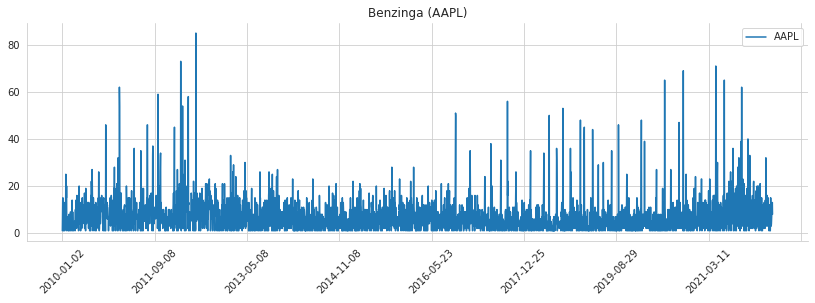

In [23]:
ax = df_aapl_groupedby_date["AAPL"].plot(title='Benzinga (AAPL)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# Microsoft

In [24]:
df_msft_groupedby_date = df_msft_non_dupes.groupby('date').count()
df_msft_groupedby_date.reset_index(inplace=True)
df_msft_groupedby_date.set_index("date", inplace=True)
df_msft_groupedby_date = df_msft_groupedby_date[["MSFT"]]

In [25]:
df_msft_groupedby_date.describe()

,MSFT
count,3105.000000
mean,3.577134
std,3.258305
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,32.000000


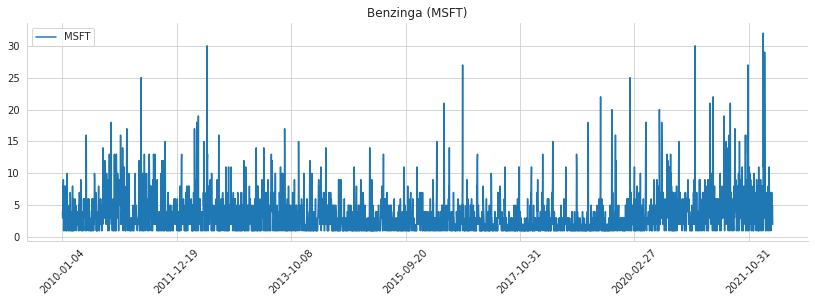

In [26]:
ax = df_msft_groupedby_date["MSFT"].plot(title='Benzinga (MSFT)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# Amazon

In [27]:
df_amzn_groupedby_date = df_amzn_non_dupes.groupby('date').count()
df_amzn_groupedby_date.reset_index(inplace=True)
df_amzn_groupedby_date.set_index("date", inplace=True)
df_amzn_groupedby_date = df_amzn_groupedby_date[["AMZN"]]

In [28]:
df_amzn_groupedby_date.describe()

,AMZN
count,3376.000000
mean,4.724526
std,4.330351
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,46.000000


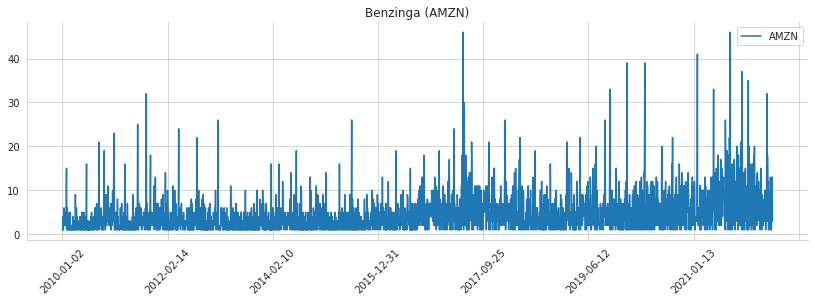

In [29]:
ax = df_amzn_groupedby_date["AMZN"].plot(title='Benzinga (AMZN)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# Facebook

In [30]:
df_fb_groupedby_date = df_fb_non_dupes.groupby('date').count()
df_fb_groupedby_date.reset_index(inplace=True)
df_fb_groupedby_date.set_index("date", inplace=True)
df_fb_groupedby_date = df_fb_groupedby_date[["FB"]]

In [31]:
df_fb_groupedby_date.describe()

,FB
count,2782.000000
mean,4.455068
std,4.597651
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,65.000000


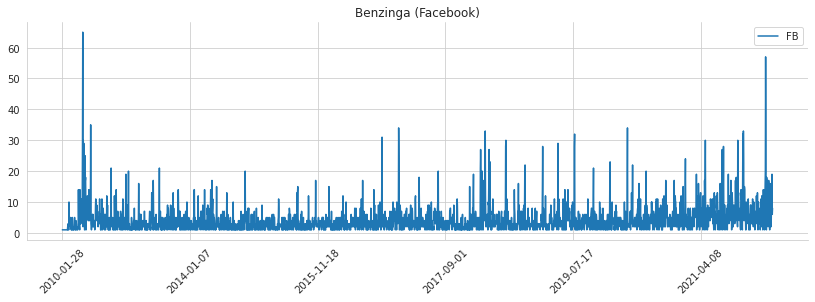

In [32]:
ax = df_fb_groupedby_date["FB"].plot(title='Benzinga (Facebook)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# NVIDIA

In [33]:
df_nvda_groupedby_date = df_nvda_non_dupes.groupby('date').count()
df_nvda_groupedby_date.reset_index(inplace=True)
df_nvda_groupedby_date.set_index("date", inplace=True)
df_nvda_groupedby_date = df_nvda_groupedby_date[["NVDA"]]

In [34]:
df_nvda_groupedby_date.describe()

,NVDA
count,1721.000000
mean,2.904126
std,3.326006
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,33.000000


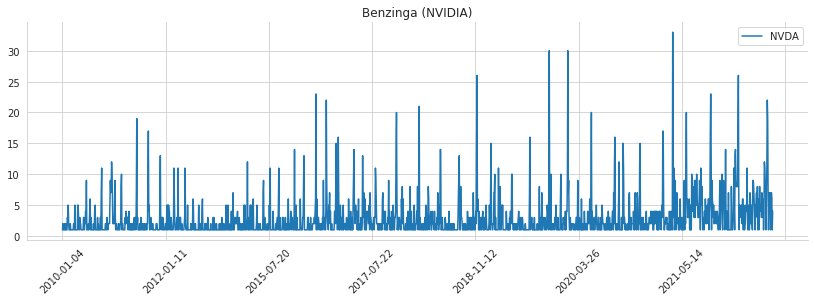

In [35]:
ax = df_nvda_groupedby_date["NVDA"].plot(title='Benzinga (NVIDIA)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# Intel

In [36]:
df_intc_groupedby_date = df_intc_non_dupes.groupby('date').count()
df_intc_groupedby_date.reset_index(inplace=True)
df_intc_groupedby_date.set_index("date", inplace=True)
df_intc_groupedby_date = df_intc_groupedby_date[["INTC"]]

In [37]:
df_intc_groupedby_date.describe()

,INTC
count,2359.000000
mean,2.759220
std,3.343574
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,42.000000


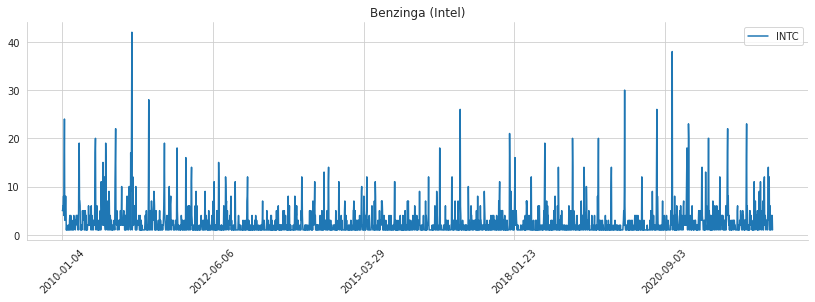

In [38]:
ax = df_intc_groupedby_date["INTC"].plot(title='Benzinga (Intel)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

In [44]:
df_aapl_non_dupes.to_csv(csv_path + "aapl_non_dupes.csv", index=False)

In [48]:
df_aapl_non_dupes_test = pd.read_csv(csv_path + "aapl_non_dupes.csv", low_memory=False)

In [50]:
df_aapl_non_dupes_test.head()

,date,author,created,updated,title,teaser,body,url,image,channels,stocks,tags,AAPL,MSFT,AMZN,FB,NVDA,INTC,NFLX
0,2010-01-02,Benzinga,"Sat, 02 Jan 2010 22:47:49 -0400","Mon, 04 Jan 2010 17:23:32 -0400",Time to Sell Apple Puts,NaN,In case you missed the meteoric run in Apple (...,https://www.benzinga.com/node/74385,[],"[{'name': 'Long Ideas'}, {'name': 'Upgrades'},...",[{'name': 'AAPL'}],[{'name': 'Steve Jobs'}],True,False,False,False,False,False,False
1,2010-01-04,Benzinga,"Mon, 04 Jan 2010 09:45:06 -0400","Mon, 04 Jan 2010 12:31:34 -0400",Nexus – Will It Change Telecom Industry Dynami...,NaN,"Google’s (NASDAQ: <a class=""ticker"" href=""/sto...",https://www.benzinga.com/node/74734,[],"[{'name': 'Earnings'}, {'name': 'News'}, {'nam...","[{'name': 'AAPL'}, {'name': 'GOOG'}, {'name': ...",[],True,False,False,False,False,False,False
2,2010-01-04,Benzinga,"Mon, 04 Jan 2010 10:07:48 -0400","Tue, 05 Jan 2010 10:02:03 -0400","Company News for January 04, 2010 - Corporate ...",NaN,"<p align=""justify"">• European shares are up on...",https://www.benzinga.com/node/74823,[],[],"[{'name': 'AAPL'}, {'name': 'ACL'}, {'name': '...","[{'name': 'Broadcasting & Cable TV'}, {'name':...",True,False,False,False,False,False,False
3,2010-01-04,Benzinga,"Mon, 04 Jan 2010 11:03:20 -0400","Mon, 04 Jan 2010 11:46:49 -0400","Technology Industry Update (DELL, AAPL, AMD, I...",NaN,Oppenheimer has released its latest report on ...,https://www.benzinga.com/node/74901,[],"[{'name': 'News'}, {'name': 'Markets'}, {'name...","[{'name': 'AAPL'}, {'name': 'AMD'}, {'name': '...",[{'name': 'Oppenheimer'}],True,False,False,False,False,True,False
4,2010-01-04,Benzinga,"Mon, 04 Jan 2010 11:40:28 -0400","Mon, 04 Jan 2010 17:21:30 -0400",Apple Defies Gravity,NaN,Apple (NASDAQ: AAPL) aficionados have been wai...,https://www.benzinga.com/node/74945,[],"[{'name': 'Options'}, {'name': 'Markets'}, {'n...",[{'name': 'AAPL'}],[],True,False,False,False,False,False,False


In [43]:
df_aapl_non_dupes.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29077 entries, 74385.0 to 25998517.0
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      29077 non-null  object
 1   author    29077 non-null  object
 2   created   29077 non-null  object
 3   updated   29077 non-null  object
 4   title     29077 non-null  object
 5   teaser    4824 non-null   object
 6   body      23916 non-null  object
 7   url       29077 non-null  object
 8   image     29077 non-null  object
 9   channels  29077 non-null  object
 10  stocks    29077 non-null  object
 11  tags      29077 non-null  object
 12  AAPL      29077 non-null  bool  
 13  MSFT      29077 non-null  bool  
 14  AMZN      29077 non-null  bool  
 15  FB        29077 non-null  bool  
 16  NVDA      29077 non-null  bool  
 17  INTC      29077 non-null  bool  
 18  NFLX      29077 non-null  bool  
dtypes: bool(7), object(12)
memory usage: 4.1+ MB


In [40]:
df_aapl_non_dupes.iloc[5]["title"]

'Apple Inc. (AAPL) Maintains A Buy Rating'

In [41]:
df_aapl_non_dupes.iloc[5]["body"]

'Analysts at CLSA Asia-Pacific Markets have maintained a Buy rating for Apple Inc. (NASDAQ: <a class="ticker" href="/stock/aapl#NASDAQ">AAPL</a>). Analysts have set a 12 month price target of $260 for Apple. \r\n\r\nApple shares have rallied 10% over the past two weeks on the anticipation of a major product announcement. Analysts feel that the rally is impressive considering the facts that, one, Google Inc. (NASDAQ: <a class="ticker" href="/stock/goog#NASDAQ">GOOG</a>) is planning its own branded phone, two, potential revamp of the iTunes business model and three, a brief wireless network interruptions resulting in rising data usage rates.\r\n\r\nAnalysts believe that this week’s Consumer Electronic Show will be a test for Apple as competitors would take advantage of Apple’s absence with announcements of new products. Analysts have not included the announcement of the much anticipated tablet product in their estimates. However analysts feel that the anticipation of a product announceme